In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [57]:
df = pd.read_csv('../data/loan_approval_dataset.csv')
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

# Data Preprocessing

## Check for nan values

In [58]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Note:
- There is no NULL values

## Check Dtypes and column names

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Note:
- There is a space in the column names

In [61]:
# remove the space in the column name
df.columns = df.columns.str.strip()

In [63]:
# update the type of columns
cols = ['education', 'self_employed', 'loan_status']

for col in cols:
    df[col] = df[col].astype('string')

In [88]:
# remove the space in values in these columns
df['loan_status'] = df['loan_status'].str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()

In [89]:
# check column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   string
 3   self_employed             4269 non-null   string
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   string
dtypes: int64(10), string(3)
memory usage: 433.7 KB


## Describe

In [90]:
# check the descriptive statistic
df.describe()

loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  
count         4.269000e+03      4.269000e+03  
mean          1.512631e+07      4.976692e+06  
std           9.103754e+06      3.250185e+06  
min           3.000000e+05      0.000000e+00  
25%           7.500000e+06      2.300000e+06  
50%           1.460000e+07      4.600000e+06  
75%           2.170000e+07      7.100000e+06  
max           3.920000e+07      1.470000e+07

# EDA

- How big is the DataFrame (shape)
- Which is the biggest annual income?
- Which is the smallest annual income?
- Which is the highest cibil score?
- Which is the smallest cibil score
- How many loan term?

In [91]:
# check the shape
df.shape

(4269, 13)

Note:
- There are 4269 rows, 13 columns

In [92]:
# checking duplicates
df_d = df.copy()
df_d.drop_duplicates()
df_d.shape

(4269, 13)

Note:
- No duplicates. remove df_d

In [93]:
del df_d

<function matplotlib.pyplot.show(close=None, block=None)>

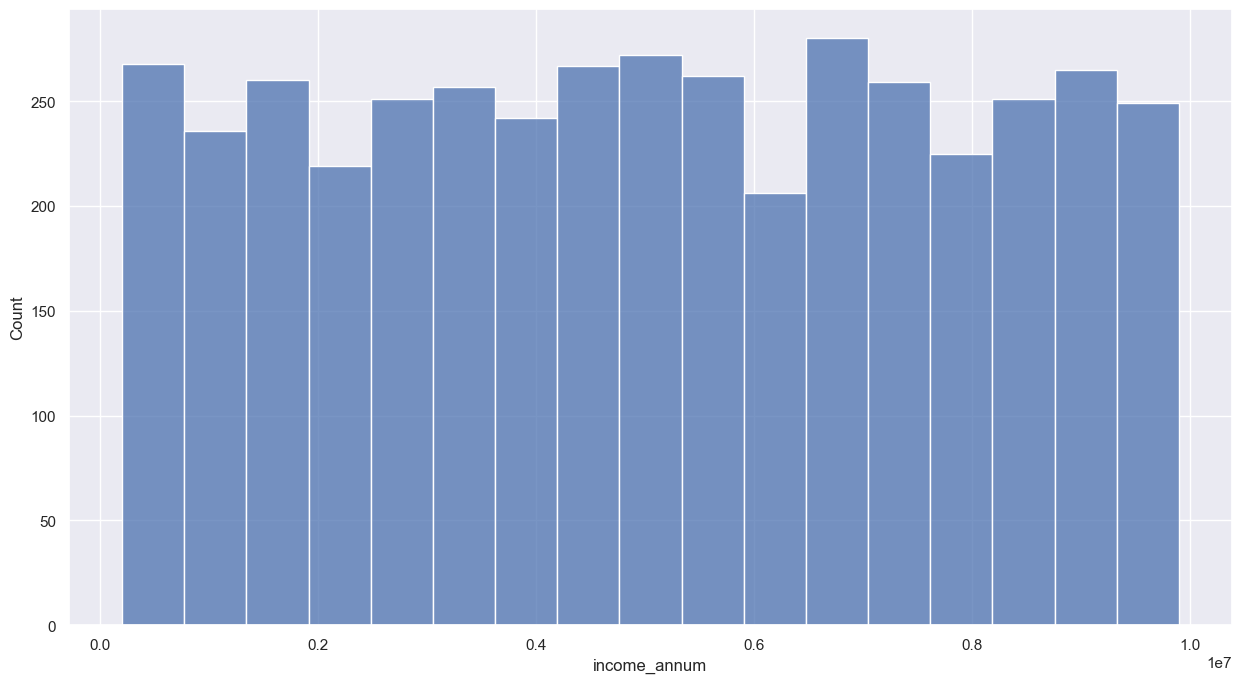

In [94]:
# Histogram to check the min/max annual income
sns.histplot(x='income_annum', data=df)
plt.show

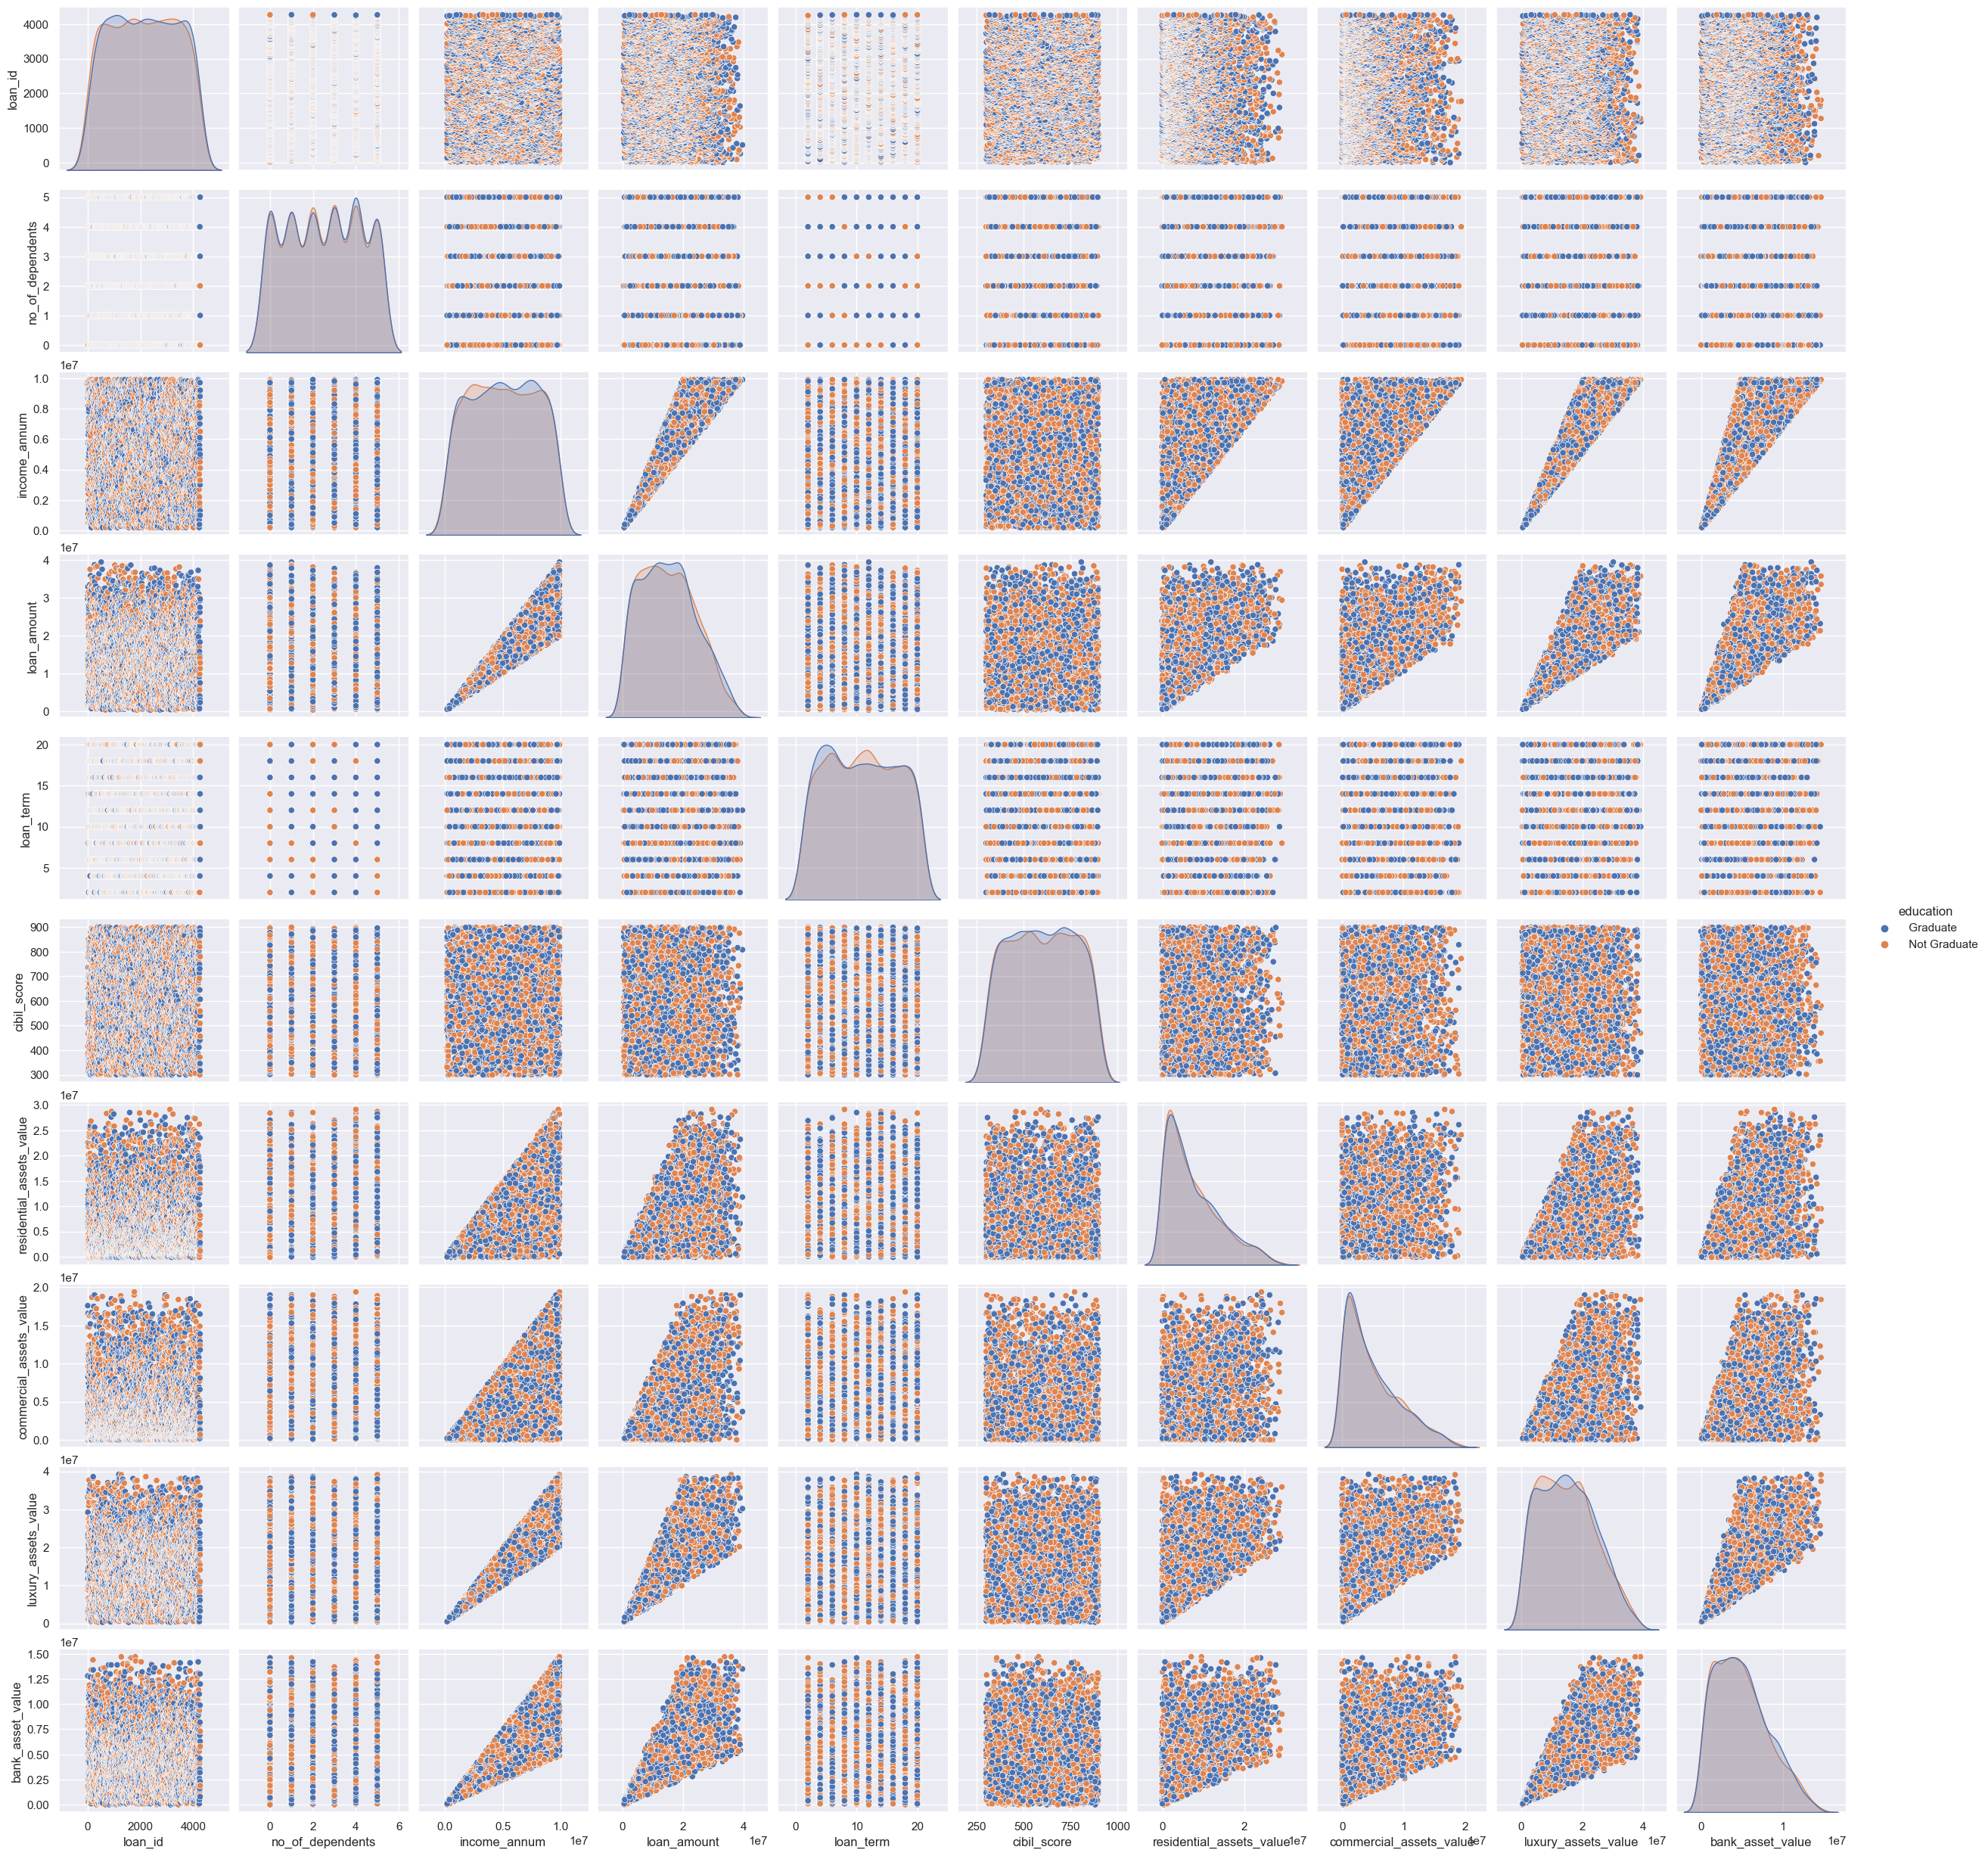

In [70]:
# check the relationship between features
sns.pairplot(data=df, hue='education')

<Axes: >

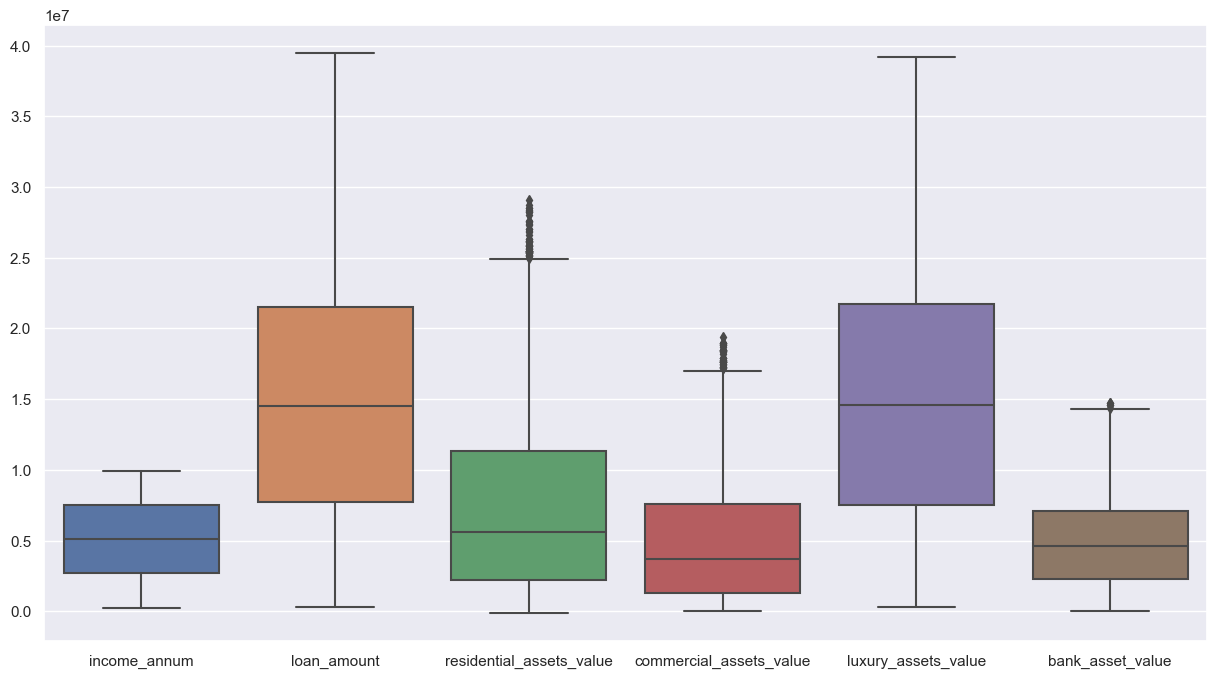

In [95]:
# Outliers
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(df[['income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']] )

In [96]:
# check outlier records
df[df['residential_assets_value'] > 25000000]

loan_id  no_of_dependents     education self_employed  income_annum  \
82         83                 2  Not Graduate           Yes       9900000   
98         99                 4      Graduate            No       9400000   
123       124                 0  Not Graduate           Yes       9000000   
228       229                 1  Not Graduate           Yes       8700000   
262       263                 3      Graduate            No       9200000   
693       694                 0      Graduate            No       9200000   
714       715                 4  Not Graduate            No       9900000   
781       782                 3  Not Graduate           Yes       9900000   
892       893                 4      Graduate            No       9300000   
905       906                 5  Not Graduate            No       9700000   
919       920                 0  Not Graduate           Yes       8800000   
924       925                 0  Not Graduate           Yes       8600000   
953       954                 5      Graduate           Yes       8700000   
956       957                 0  Not Graduate           Yes       9100000   
987       988                 5      Graduate            No       9400000   
997       998                 3  Not Graduate           Yes       8500000   
1002     1003                 5  Not Graduate            No       9600000   
1397     1398                 1  Not Graduate           Yes       9200000   
1419     1420                 2      Graduate            No       9100000   
1468     1469                 3  Not Graduate           Yes       9500000   
1591     1592                 1      Graduate            No       9500000   
1625     1626                 2  Not Graduate           Yes       9900000   
1965     1966                 0  Not Graduate            No       9900000   
1997     1998                 0      Graduate            No       9300000   
2185     2186                 2      Graduate           Yes       9200000   
2318     2319                 2  Not Graduate           Yes       9600000   
2384     2385                 3      Graduate           Yes       9100000   
2412     2413                 4  Not Graduate            No       9700000   
2586     2587                 1  Not Graduate           Yes       9800000   
2715     2716                 4      Graduate           Yes       9100000   
2818     2819                 1  Not Graduate           Yes       9500000   
2828     2829                 4      Graduate           Yes       9200000   
2922     2923                 0  Not Graduate           Yes       9600000   
2927     2928                 4      Graduate            No       9400000   
2930     2931                 3  Not Graduate            No       8700000   
2940     2941                 1      Graduate           Yes       9600000   
3119     3120                 4  Not Graduate            No       9800000   
3157     3158                 0  Not Graduate           Yes       8600000   
3234     3235                 1  Not Graduate            No       9900000   
3310     3311                 5  Not Graduate            No       8500000   
3498     3499                 2      Graduate           Yes       9100000   
3631     3632                 3      Graduate            No       9800000   
3763     3764                 3      Graduate            No       9600000   
3782     3783                 5      Graduate           Yes       9500000   
3868     3869                 5  Not Graduate            No       9600000   
3872     3873                 0      Graduate            No       8800000   
3880     3881                 3  Not Graduate            No       9100000   
4027     4028                 1  Not Graduate            No       9100000   
4042     4043                 4      Graduate            No       9300000   
4074     4075                 4  Not Graduate           Yes       9400000   
4237     4238                 0  Not Graduate            No       9100000   

 

In [17]:
# removing outliers

C:\Users\thong.lam\AppData\Local\Temp\ipykernel_9648\3738582558.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

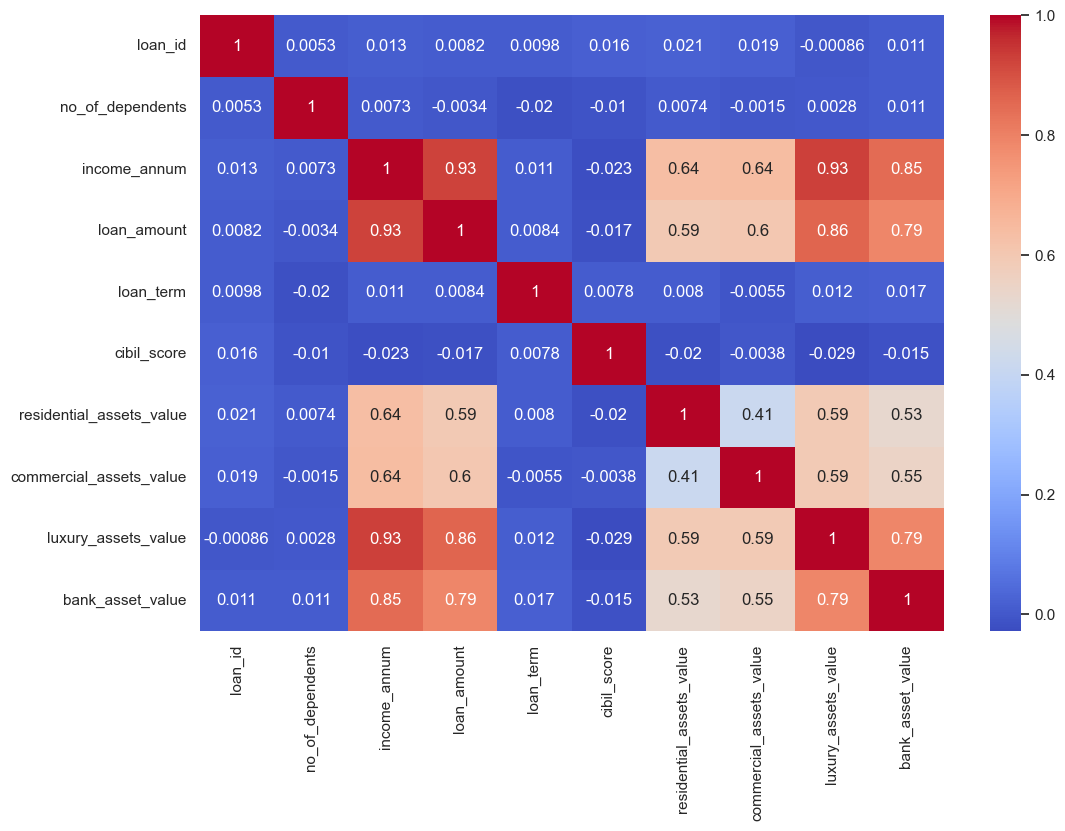

In [97]:
# using heat map to check the correlation between features
# corr = df.loc[:, ~df.columns.isin(['loan_id', 'education','self_employed', 'loan_status'])].corr()

corr = df.corr()
plt.figure(figsize=(12,8))

sns.heatmap(corr, annot=True, cmap='coolwarm')

In [98]:
df.to_csv('../output/loan_approval_cleaned_data.csv')

Testing the relationship between
- income_annum and loan_amount
- cibil_score and loan_status
- education and loan_status

Hypothesis testing 

Cibil Score has statistic significantly impact to the loan_status

In [99]:
import scipy.stats as st

T-Test

Text(0.5, 1.0, 'Approval status by Cibil score')

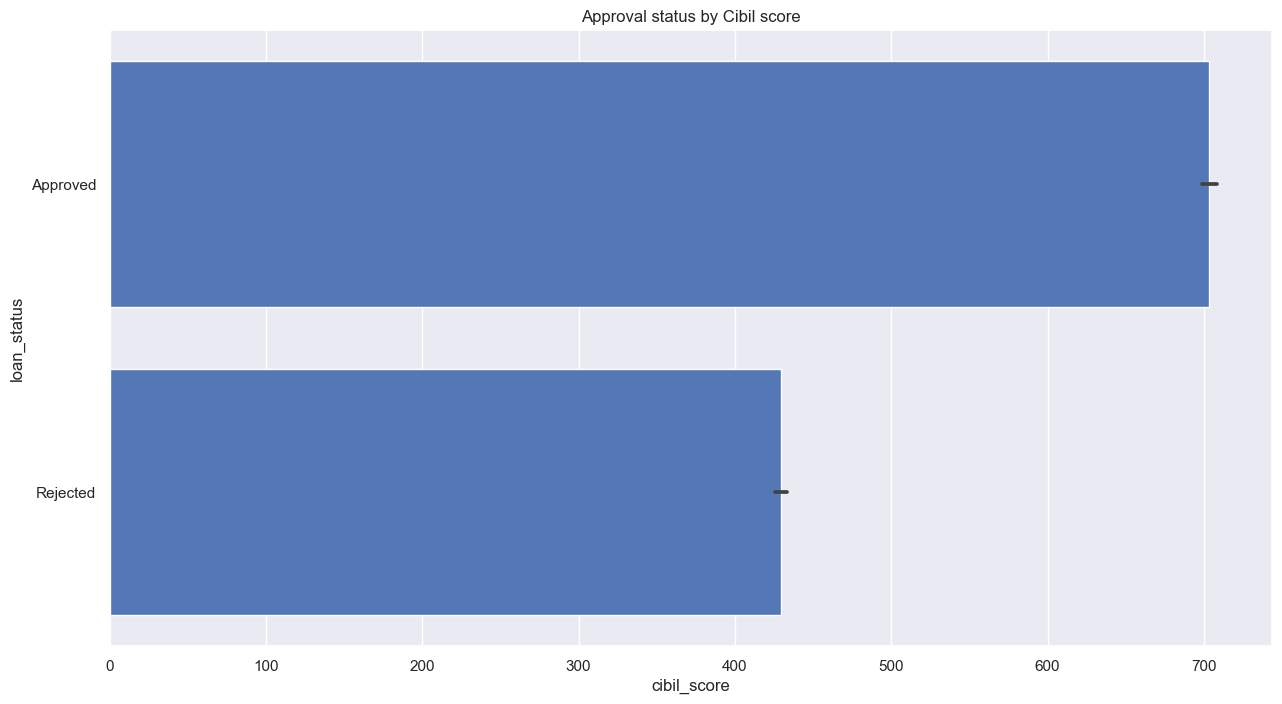

In [100]:
ax = sns.barplot(data=df, x='cibil_score', y='loan_status', color='#4473C5')
ax.set_title('Approval status by Cibil score')

In [105]:
df[df['loan_status']=='Rejected']

loan_id  no_of_dependents     education self_employed  income_annum  \
1           2                 0  Not Graduate           Yes       4100000   
2           3                 3      Graduate            No       9100000   
3           4                 3      Graduate            No       8200000   
4           5                 5  Not Graduate           Yes       9800000   
5           6                 0      Graduate           Yes       4800000   
...       ...               ...           ...           ...           ...   
4258     4259                 5      Graduate           Yes       9700000   
4259     4260                 0  Not Graduate           Yes       4500000   
4262     4263                 5      Graduate            No       1300000   
4264     4265                 5      Graduate           Yes       1000000   
4266     4267                 2  Not Graduate            No       6500000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
5        13500000         10          319                   6800000   
...           ...        ...          ...                       ...   
4258     22600000         16          346                  23500000   
4259     11500000         14          509                  13400000   
4262      3000000         20          540                   1000000   
4264      2300000         12          317                   2800000   
4266     23900000         18          457                   1200000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
5                     8300000             13700000           5100000   
...                       ...                  ...               ...   
4258                 12900000             26800000          13000000   
4259                  2300000             15400000           5900000   
4262                  2300000              3200000           1900000   
4264                   500000              3300000            800000   
4266                 12400000             18100000           7300000   

     loan_status  
1       Rejected  
2       Rejected  
3       Rejected  
4       Rejected  
5       Rejected  
...          ...  
4258    Rejected  
4259    Rejected  
4262    Rejected  
4264    Rejected  
4266    Rejected  

[1613 rows x 13 columns]

In [108]:
from scipy.stats import ttest_ind

#define samples
approved = df[df['loan_status']=='Approved']
rejected = df[df['loan_status']=='Rejected']

#perform independent two sample t-test
ttest_ind(approved['cibil_score'], rejected['cibil_score'])
#Ttest_indResult(statistic=78.96236186015597, pvalue=0.)


TtestResult(statistic=78.96236186015597, pvalue=0.0, df=4267.0)

Note:
- p value less than .05 so we reject the null hypothesis of t-test
- The different in the loan_status has related to different of mean values of cibil_score

ANOVA

In [26]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [110]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder



# model = ols(formula="loan_amount ~ C(residential_assets_value) + C(income_annum) + C(residential_assets_value):C(income_annum)",data=df).fit()
# change the education and self_employed to the numeric value
cols = ['education', "self_employed"]
le = LabelEncoder()
df['education_number'] = le.fit_transform(df['education'])
df['self_employed_number'] = le.fit_transform(df['self_employed'])

model = ols(formula="loan_amount ~ C(education_number) + C(self_employed_number)",data=df).fit()


In [111]:
sm.stats.anova_lm(model, typ=2)

sum_sq      df         F    PR(>F)
C(education_number)      3.971941e+13     1.0  0.485500  0.485979
C(self_employed_number)  1.005359e+12     1.0  0.012289  0.911737
Residual                 3.490069e+17  4266.0       NaN       NaN

Note:
- From this test we can see that the p value is higher than .05
- The education and self_employed can't explain the loan amount

Chi-Squared Test: for testing the relationship between two categorical variables
* hypothesis
-   null hypothesis: "education" and "loan_status" are independant to each other
-   alternative hypothesis: "education" and "loan_status" are dependant to each other

In [ ]:
ed_loan = pd.crosstab(df['education'], df['loan_status'])
ed_loan

loan_status     0    1
education             
0            1339  805
1            1317  808

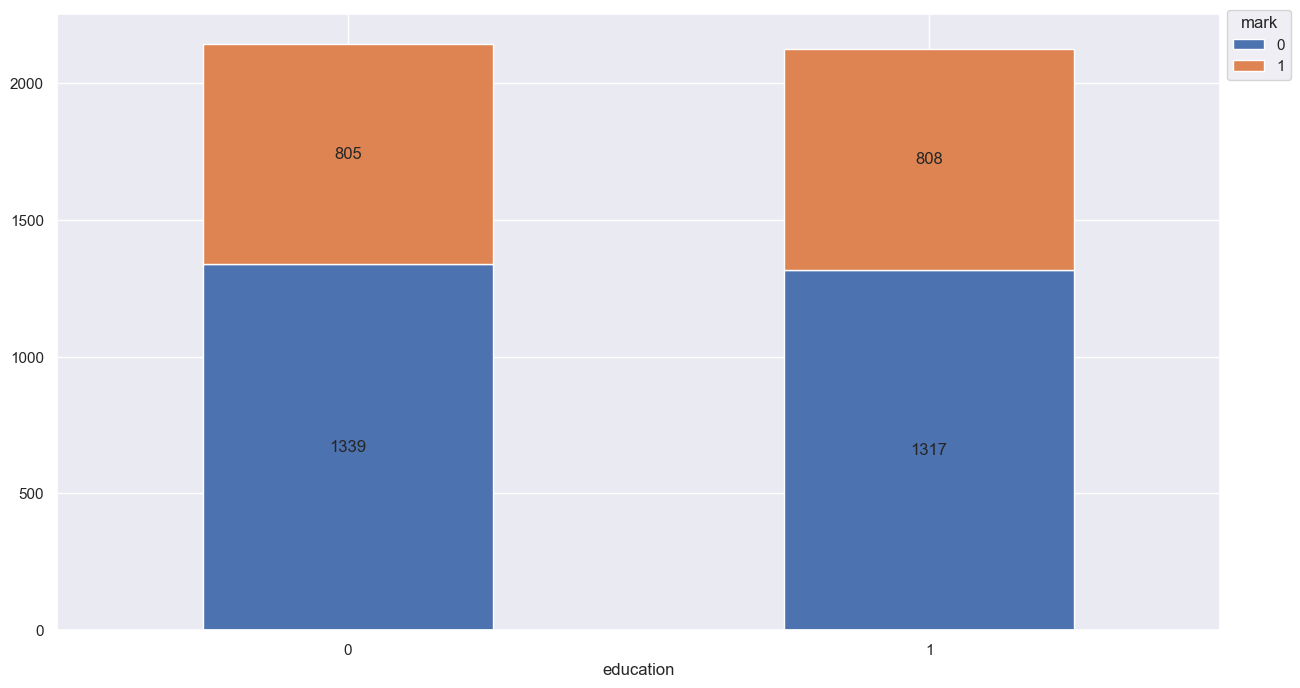

In [ ]:
ax = ed_loan.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

for c in ax.containers:
    ax.bar_label(c, label_type='center')

In [ ]:
st.chi2_contingency(ed_loan)

Chi2ContingencyResult(statistic=0.08395754138250573, pvalue=0.7720042291016309, dof=1, expected_freq=array([[1333.91051769,  810.08948231],
       [1322.08948231,  802.91051769]]))

Since the pvalue is 0.77 so we can't reject the Null Hypothesis which means that there is a relationship between education and loan_status

Shapiro test (for checking Normality)
H0: Distribution is normal
H1: Distribution is not normal

In [ ]:
import scipy.stats as st
st.shapiro(df.income_annum)

ShapiroResult(statistic=0.9564422965049744, pvalue=6.158479188805275e-34)

Q: Is there a correlation between loan amount and annual income

In [113]:
from scipy.stats import pearsonr
 
# Convert dataframe into series
loan_amount = df['loan_amount']
income_annum = df['income_annum']
 
# Apply the pearsonr()
corr, _ = pearsonr(loan_amount, income_annum)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.927


## Build the model

Multiple Linear Regression

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [ ]:
cols = ['education', "self_employed", "loan_status"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# X = df[['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score',
#        'residential_assets_value', 'commercial_assets_value',
#        'luxury_assets_value', 'bank_asset_value']]
# y = df['loan_amount']

In [ ]:
X = df.drop(columns=['loan_amount'], axis=1)
y = df['loan_amount']

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2221.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:08:11   Log-Likelihood:                -70204.
No. Observations:                4269   AIC:                         1.404e+05
Df Residuals:                    4256   BIC:                         1.405e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.094e+06   3.77e+05      5.550      0.000    1.35e+06    2.83e+06
loan_id                    -31.2954     41.787     -0.749      0.454    -113.220      50.630
no_of_dependents         -4.881e+04   3.04e+04     -1.608      0.108   -1.08e+05    1.07e+04
education                 7010.6959   1.03e+05      0.068      0.946   -1.95e+05    2.09e+05
self_employed            -1.376e+04   1.03e+05     -0.134      0.894   -2.16e+05    1.88e+05
income_annum                 2.9839      0.062     47.890      0.000       2.862       3.106
loan_term                 9326.8259   9178.063      1.016      0.310   -8666.965    2.73e+04
cibil_score              -2515.8163    473.700     -5.311      0.000   -3444.516   -1587.116
residential_assets_value     0.0091      0.010      0.890      0.374      -0.011       0.029
commercial_assets_value      0.0300      0.015      1.966      0.049    8.48e-05       0.060
luxury_assets_value         -0.0083      0.015     -0.543      0.587      -0.038       0.022
bank_asset_value            -0.0145      0.030     -0.480      0.631      -0.074       0.045
loan_status               -1.26e+06    1.7e+05     -7.433      0.000   -1.59e+06   -9.28e+05
==============================================================================
Omnibus:                        4.812   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                5.329
Skew:                           0.012   Prob(JB):                       0.0696
Kurtosis:                       3.171   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Remove the luxury_assets_value because p_value is high
# X = df[['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score',
#        'residential_assets_value', 'commercial_assets_value',
#        'bank_asset_value']]
# y = df['loan_amount']

In [ ]:
X = df.drop(columns=['loan_amount', 'education'], axis=1)
y = df['loan_amount']

In [ ]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2424.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:22:20   Log-Likelihood:                -70204.
No. Observations:                4269   AIC:                         1.404e+05
Df Residuals:                    4257   BIC:                         1.405e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.097e+06   3.74e+05      5.604      0.000    1.36e+06    2.83e+06
loan_id                    -31.3404     41.777     -0.750      0.453    -113.246      50.565
no_of_dependents         -4.881e+04   3.03e+04     -1.608      0.108   -1.08e+05    1.07e+04
self_employed            -1.359e+04   1.03e+05     -0.132      0.895   -2.15e+05    1.88e+05
income_annum                 2.9839      0.062     47.896      0.000       2.862       3.106
loan_term                 9330.8438   9176.801      1.017      0.309   -8660.470    2.73e+04
cibil_score              -2515.4235    473.610     -5.311      0.000   -3443.946   -1586.901
residential_assets_value     0.0091      0.010      0.889      0.374      -0.011       0.029
commercial_assets_value      0.0301      0.015      1.968      0.049       0.000       0.060
luxury_assets_value         -0.0083      0.015     -0.544      0.587      -0.038       0.022
bank_asset_value            -0.0145      0.030     -0.480      0.631      -0.074       0.045
loan_status               -1.26e+06    1.7e+05     -7.433      0.000   -1.59e+06   -9.28e+05
==============================================================================
Omnibus:                        4.801   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                5.316
Skew:                           0.012   Prob(JB):                       0.0701
Kurtosis:                       3.171   Cond. No.                     1.69e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Remove the luxury_assets_value because p_value is high
# X = df[['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score',
#        'residential_assets_value', 'commercial_assets_value']]
# y = df['loan_amount']

In [ ]:
X = df.drop(columns=['loan_amount', 'education', 'self_employed'], axis=1)
y = df['loan_amount']

In [ ]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2667.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:23:16   Log-Likelihood:                -70204.
No. Observations:                4269   AIC:                         1.404e+05
Df Residuals:                    4258   BIC:                         1.405e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      2.09e+06    3.7e+05      5.644      0.000    1.36e+06    2.82e+06
loan_id                    -31.3519     41.772     -0.751      0.453    -113.247      50.544
no_of_dependents         -4.882e+04   3.03e+04     -1.609      0.108   -1.08e+05    1.07e+04
income_annum                 2.9839      0.062     47.901      0.000       2.862       3.106
loan_term                 9324.6921   9175.624      1.016      0.310   -8664.313    2.73e+04
cibil_score              -2514.8803    473.537     -5.311      0.000   -3443.260   -1586.500
residential_assets_value     0.0091      0.010      0.889      0.374      -0.011       0.029
commercial_assets_value      0.0301      0.015      1.972      0.049       0.000       0.060
luxury_assets_value         -0.0083      0.015     -0.545      0.586      -0.038       0.022
bank_asset_value            -0.0145      0.030     -0.479      0.632      -0.074       0.045
loan_status               -1.26e+06   1.69e+05     -7.433      0.000   -1.59e+06   -9.27e+05
==============================================================================
Omnibus:                        4.798   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                5.312
Skew:                           0.012   Prob(JB):                       0.0702
Kurtosis:                       3.171   Cond. No.                     1.68e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Remove the loan term because p_value is high
# X = df[['no_of_dependents', 'income_annum', 'cibil_score',
#        'residential_assets_value', 'commercial_assets_value']]
# y = df['loan_amount']

In [ ]:
X = df.drop(columns=['loan_amount', 'education', 'self_employed', 'bank_asset_value'], axis=1)
y = df['loan_amount']

In [ ]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2963.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:23:54   Log-Likelihood:                -70204.
No. Observations:                4269   AIC:                         1.404e+05
Df Residuals:                    4259   BIC:                         1.405e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      2.09e+06    3.7e+05      5.646      0.000    1.36e+06    2.82e+06
loan_id                    -31.3467     41.769     -0.750      0.453    -113.235      50.541
no_of_dependents         -4.896e+04   3.03e+04     -1.614      0.107   -1.08e+05    1.05e+04
income_annum                 2.9692      0.054     54.772      0.000       2.863       3.075
loan_term                 9252.2372   9173.549      1.009      0.313   -8732.700    2.72e+04
cibil_score              -2513.8106    473.489     -5.309      0.000   -3442.096   -1585.525
residential_assets_value     0.0093      0.010      0.907      0.365      -0.011       0.029
commercial_assets_value      0.0300      0.015      1.968      0.049       0.000       0.060
luxury_assets_value         -0.0082      0.015     -0.539      0.590      -0.038       0.022
loan_status              -1.259e+06   1.69e+05     -7.429      0.000   -1.59e+06   -9.27e+05
==============================================================================
Omnibus:                        4.871   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                5.404
Skew:                           0.012   Prob(JB):                       0.0671
Kurtosis:                       3.173   Cond. No.                     1.62e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = df.drop(columns=['loan_amount', 'education', 'self_employed', 'bank_asset_value', 'luxury_assets_value'], axis=1)
y = df['loan_amount']

In [ ]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     3334.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:24:43   Log-Likelihood:                -70204.
No. Observations:                4269   AIC:                         1.404e+05
Df Residuals:                    4260   BIC:                         1.405e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.085e+06    3.7e+05      5.634      0.000    1.36e+06    2.81e+06
loan_id                    -30.5894     41.741     -0.733      0.464    -112.424      51.246
no_of_dependents          -4.88e+04   3.03e+04     -1.609      0.108   -1.08e+05    1.07e+04
income_annum                 2.9442      0.028    104.556      0.000       2.889       2.999
loan_term                 9210.0934   9172.452      1.004      0.315   -8772.692    2.72e+04
cibil_score              -2506.9018    473.276     -5.297      0.000   -3434.770   -1579.034
residential_assets_value     0.0093      0.010      0.908      0.364      -0.011       0.029
commercial_assets_value      0.0301      0.015      1.975      0.048       0.000       0.060
loan_status              -1.257e+06   1.69e+05     -7.420      0.000   -1.59e+06   -9.25e+05
==============================================================================
Omnibus:                        5.012   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                5.575
Skew:                           0.012   Prob(JB):                       0.0616
Kurtosis:                       3.175   Cond. No.                     9.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = df.drop(columns=['loan_amount', 'education', 'self_employed', 'bank_asset_value', 'luxury_assets_value',
                    'loan_id'], axis=1)
y = df['loan_amount']

In [ ]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     3811.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:25:25   Log-Likelihood:                -70204.
No. Observations:                4269   AIC:                         1.404e+05
Df Residuals:                    4261   BIC:                         1.405e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.021e+06    3.6e+05      5.618      0.000    1.32e+06    2.73e+06
no_of_dependents         -4.893e+04   3.03e+04     -1.613      0.107   -1.08e+05    1.05e+04
income_annum                 2.9444      0.028    104.571      0.000       2.889       3.000
loan_term                 9132.6461   9171.345      0.996      0.319   -8847.967    2.71e+04
cibil_score              -2507.8655    473.249     -5.299      0.000   -3435.680   -1580.051
residential_assets_value     0.0092      0.010      0.896      0.370      -0.011       0.029
commercial_assets_value      0.0300      0.015      1.966      0.049    8.29e-05       0.060
loan_status              -1.256e+06   1.69e+05     -7.414      0.000   -1.59e+06   -9.24e+05
==============================================================================
Omnibus:                        5.067   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.638
Skew:                           0.014   Prob(JB):                       0.0597
Kurtosis:                       3.176   Cond. No.                     9.30e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = df.drop(columns=['loan_amount', 'education', 'self_employed', 'bank_asset_value', 'luxury_assets_value',
                    'loan_id', 'residential_assets_value'], axis=1)
y = df['loan_amount']

In [ ]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     4446.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:26:06   Log-Likelihood:                -70205.
No. Observations:                4269   AIC:                         1.404e+05
Df Residuals:                    4262   BIC:                         1.405e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.022e+06    3.6e+05      5.620      0.000    1.32e+06    2.73e+06
no_of_dependents        -4.883e+04   3.03e+04     -1.610      0.108   -1.08e+05    1.06e+04
income_annum                2.9578      0.024    123.951      0.000       2.911       3.005
loan_term                9140.7209   9171.128      0.997      0.319   -8839.466    2.71e+04
cibil_score             -2509.3260    473.235     -5.302      0.000   -3437.113   -1581.539
commercial_assets_value     0.0302      0.015      1.977      0.048       0.000       0.060
loan_status             -1.256e+06   1.69e+05     -7.413      0.000   -1.59e+06   -9.24e+05
==============================================================================
Omnibus:                        5.003   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                5.557
Skew:                           0.014   Prob(JB):                       0.0621
Kurtosis:                       3.175   Cond. No.                     6.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = df.drop(columns=['loan_amount', 'education', 'self_employed', 'bank_asset_value', 'luxury_assets_value',
                    'loan_id', 'residential_assets_value', 'loan_term'], axis=1)
y = df['loan_amount']

In [ ]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     5335.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:28:16   Log-Likelihood:                -70205.
No. Observations:                4269   AIC:                         1.404e+05
Df Residuals:                    4263   BIC:                         1.405e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.068e+06   3.57e+05      5.794      0.000    1.37e+06    2.77e+06
no_of_dependents        -4.954e+04   3.03e+04     -1.634      0.102   -1.09e+05    9904.934
income_annum                2.9582      0.024    123.991      0.000       2.911       3.005
cibil_score             -2438.4936    467.868     -5.212      0.000   -3355.758   -1521.229
commercial_assets_value     0.0300      0.015      1.963      0.050    4.52e-05       0.060
loan_status             -1.224e+06   1.66e+05     -7.356      0.000   -1.55e+06   -8.98e+05
==============================================================================
Omnibus:                        4.828   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.339
Skew:                           0.014   Prob(JB):                       0.0693
Kurtosis:                       3.171   Cond. No.                     6.31e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = df.drop(columns=['loan_amount', 'education', 'self_employed', 'bank_asset_value', 'luxury_assets_value',
                    'loan_id', 'residential_assets_value', 'loan_term', 'no_of_dependents'], axis=1)
y = df['loan_amount']

In [ ]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     6666.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:29:04   Log-Likelihood:                -70206.
No. Observations:                4269   AIC:                         1.404e+05
Df Residuals:                    4264   BIC:                         1.405e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     1.95e+06    3.5e+05      5.578      0.000    1.26e+06    2.63e+06
income_annum                2.9578      0.024    123.956      0.000       2.911       3.005
cibil_score             -2443.3044    467.950     -5.221      0.000   -3360.731   -1525.878
commercial_assets_value     0.0301      0.015      1.976      0.048       0.000       0.060
loan_status             -1.228e+06   1.66e+05     -7.382      0.000   -1.55e+06   -9.02e+05
==============================================================================
Omnibus:                        4.693   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                5.163
Skew:                           0.016   Prob(JB):                       0.0757
Kurtosis:                       3.167   Cond. No.                     6.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note:
- The model is good fit.
- The loan amount is depended to Anual income, cibil score, commercial_assests_value

### Logistic Regression (Classification Regression)

In [ ]:
df.dtypes

loan_id                     int64
no_of_dependents            int64
education                   int32
self_employed               int32
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int32
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['education', "self_employed", "loan_status"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          0              0       9600000   
1        2                 0          1              1       4100000   
2        3                 3          0              0       9100000   
3        4                 3          0              0       8200000   
4        5                 5          1              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 17600000             22700000           8000000            0  
1                  2200000              8800000           3300000            1  
2                  4500000             33300000          12800000            1  
3                  3300000             23300000           7900000            1  
4                  8200000             29400000           5000000            1

In [ ]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# specify input and output attributes
X = df.drop(columns=['loan_status'], axis=1)
y = df['loan_status']

# split the train and test dataset
# test size is 25%, train size is 75% of the dataset
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.25,
                                       random_state=18)

In [ ]:
# LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
# Prediction
y_pred = model.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

# printing out train and test sets
  
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

Logistic Regression model accuracy (in %): 77.24719101123596
X_train : 
      loan_id  no_of_dependents  education  self_employed  income_annum  \
1158     1159                 4          0              1       5700000   
79         80                 0          1              0        700000   
2441     2442                 5          1              0       6800000   
454       455                 2          0              0       1800000   
870       871                 1          1              1       4800000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1158     16900000          4          656                  13000000   
79        1400000         14          639                   1900000   
2441     20100000         14          839                   1900000   
454       4700000          8          792                   4500000   
870      14700000          2          356                   7100000   

      commercial_assets_value  luxury_assets_value

c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Notes:
- 77% of the Loan status can be predicted based on the condidtions